# Assignment 4


Please do not change, delete or edit any cells. Write your code in between designated lines.

## Question 1 (25 points)

In [1]:
# Please go to Palette_training_4 GitHub repo and 
# 1. Read Sask_RM_data.csv.
# 2. Rename column namse Crop Year, Canola - bu/ac, Spring Wheat - bu/ac with
# Year, Canola, SpringWheat respectively.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Read csv file by using pandas 

## Your code here - down ##
df = pd.read_csv('Sask_RM_data.csv')
df.head()
## Your code here - up ##

,Crop Year,RM,Canola - bu/ac,Spring Wheat - bu/ac
0,2012,1,22.3,36.2
1,2012,2,28.6,37.2
2,2012,3,25.1,39.4
3,2012,4,21.6,31.6
4,2012,5,26.8,29.0


In [4]:
# 2. Rename columns

## Your code here - down ##
df.rename(
    columns = {
        "Crop Year":"Year",
        "Canola - bu/ac":"Canola",
        "Spring Wheat - bu/ac":"SpringWheat"
              },
    inplace = True
    )
df.head()
## Your code here - up ##

,Year,RM,Canola,SpringWheat
0,2012,1,22.3,36.2
1,2012,2,28.6,37.2
2,2012,3,25.1,39.4
3,2012,4,21.6,31.6
4,2012,5,26.8,29.0


Question 2 (65 points)

In [5]:
# 1. How many missing values in each column? 

## Your code here - down ##
df.isna().sum()
## Your code here - up ##

Year            0
RM              0
Canola         45
SpringWheat    51
dtype: int64

In [6]:
# 2. Find unique values of RMs(Rural Municipalities).

## Your code here - down ##
df['RM'].nunique()
## Your code here - up ##

295

In [7]:
# 3. Use groupby() and find top 10 RMs in terms of average Canola yield through 10 years.

## Your code here - down ##
df.groupby("RM")["Canola"].mean().sort_values(ascending=False).head(10)
## Your code here - up ##

RM
271    45.284
470    45.018
439    44.116
303    43.624
338    42.881
493    42.819
440    42.747
464    42.515
410    42.223
434    41.868
Name: Canola, dtype: float64

In [8]:
# 4. Use groupby() function and find worst 10 RMs in terms of average Spring Wheat through 10 years.

## Your code here - down ##
df.groupby("RM")["SpringWheat"].mean().sort_values().head(10)
## Your code here - up ##

RM
44     20.339000
10     21.168571
69     22.418000
45     22.920000
40     23.265000
19     24.163000
51     24.683000
101    24.993000
9      25.364000
70     25.807000
Name: SpringWheat, dtype: float64

In [9]:
# 4. Use groupby() function and find worst 3 best years in terms of average Spring Wheat.

## Your code here - down ##
df.groupby("Year")["SpringWheat"].mean().sort_values(ascending=False).head(3)
## Your code here - up ##

Year
2020    49.443357
2019    49.227431
2013    47.431525
Name: SpringWheat, dtype: float64

In [10]:
# 5. Use groupby() function and find worst 3 years in terms of average Spring Wheat through 10 years.

## Your code here - down ##
df.groupby("Year")["SpringWheat"].mean().sort_values().head(3)
## Your code here - up ##

Year
2021    30.216725
2012    34.831633
2015    37.016599
Name: SpringWheat, dtype: float64

## Question 3 (10 points)

This task is independent exploratory data analysis. Find key insights from the dataset and share your code by creating new cells.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2950 non-null   int64  
 1   RM           2950 non-null   int64  
 2   Canola       2905 non-null   float64
 3   SpringWheat  2899 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 92.3 KB


### Observation: ###

- There are **2950** observations and **4** columns in the data.
- All four variables are of numeric data type.
- There are **45** null values exists in column **Canola**. 
- There are **51** null values exists in column **SpringWheat**. 
- We will fix these null values further.

In [12]:
df['Canola'].fillna(df['Canola'].median(), inplace=True)
df['Canola'].isna().sum()

0

In [13]:
df['SpringWheat'].fillna(df['SpringWheat'].median(), inplace=True)
df['SpringWheat'].isna().sum()

0

- Let's replace those null values first.
- Fill null values of column **'Canola'** with the **median** of this column.
- Fill null values of column **'SpringWheat'** with the **median** of this column.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2950.0,2016.500000,2.872768,2012.0,2014.000,2016.50,2019.0,2021.00
RM,2950.0,247.298305,148.244294,1.0,123.000,246.00,369.0,622.00
Canola,2950.0,34.553329,9.195351,4.0,28.485,35.60,41.2,57.93
SpringWheat,2950.0,42.013749,11.935453,3.3,34.470,42.31,49.9,198.00


### Observation: ###

- This dataset covers data year ranges from **2012** to **2021**, **ten years** in total.
- The average bu/ac of Canola is **34.55**.
- The average bu/ac of Spring Wheat is **42.01**.

Year
Skew :  0.0


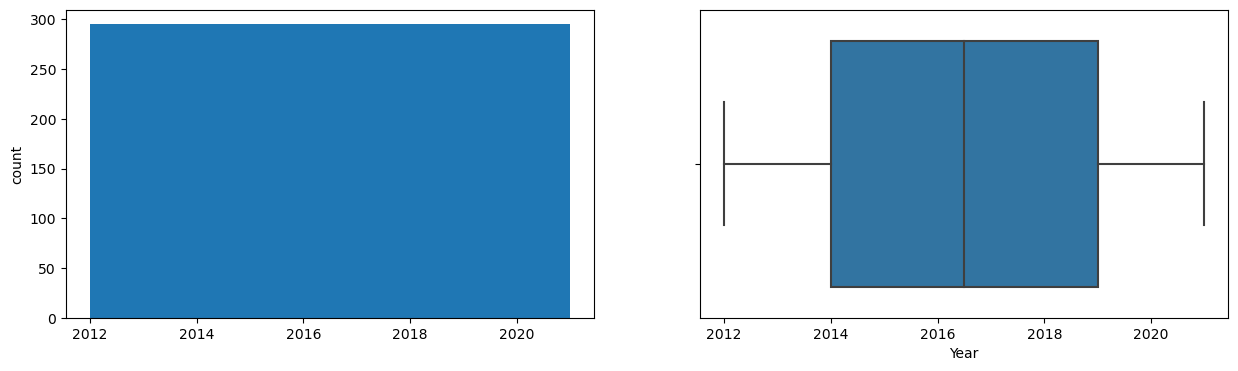

RM
Skew :  0.16


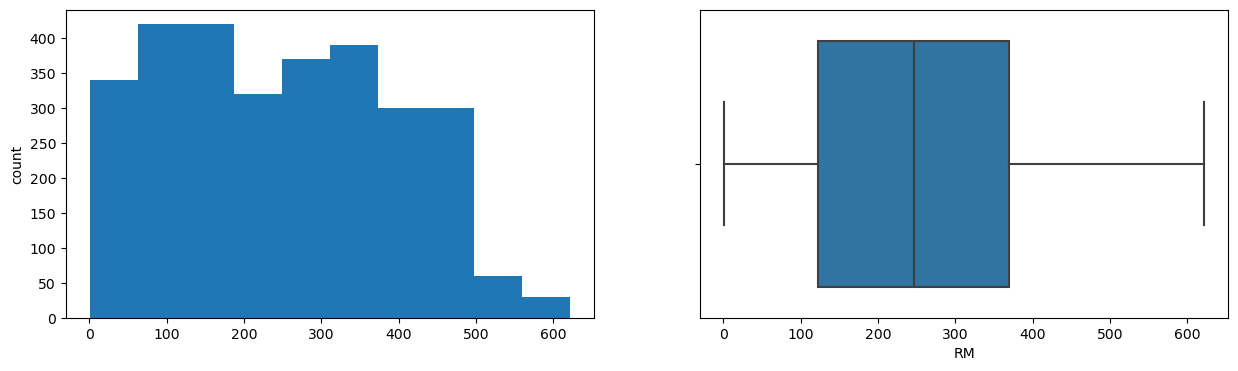

Canola
Skew :  -0.47


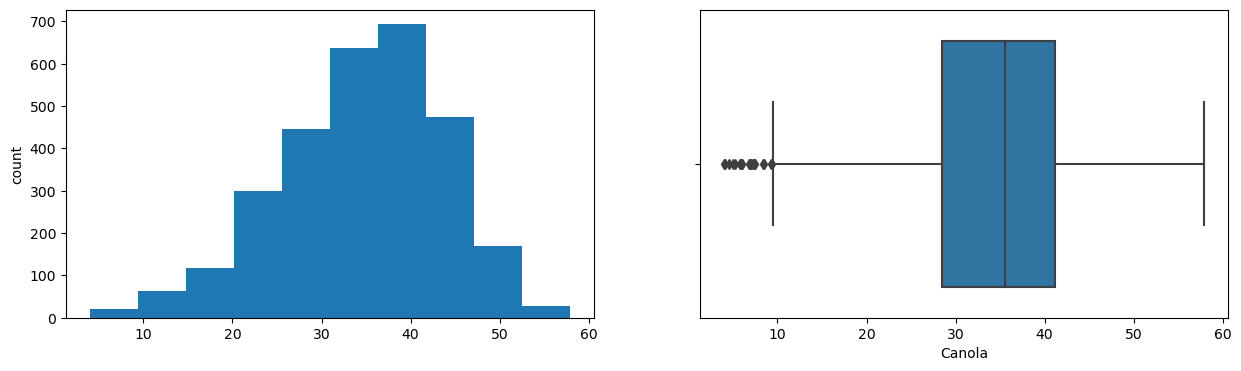

SpringWheat
Skew :  0.56


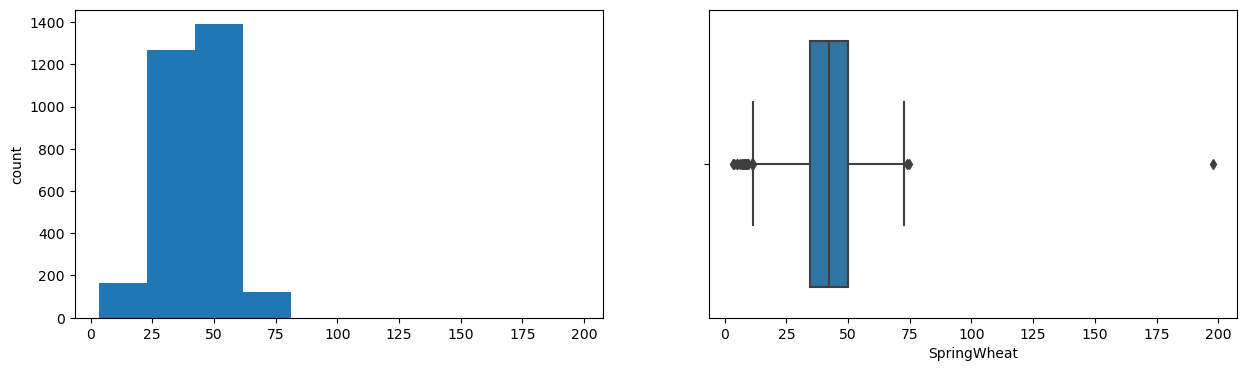

In [15]:
for col in df.columns:
    print(col)
    print('Skew : ', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

### Observations: ###

- There are extreme values exist in columns **'Canola'** and **'SpringWheat'**.
- The **SpringWheat** is normally distributed.
- The **Canola** column is left skewed.
- The most bu/ac of **Canola** is around **40**.
- The most bu/ac of **Spring Wheat** is around **50**.